In [115]:
from pyboy import PyBoy, WindowEvent
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [152]:
pyboy = PyBoy("Tetris.gb", game_wrapper=True)

In [153]:
pyboy.set_emulation_speed(5)

In [154]:
tetris = pyboy.game_wrapper()

In [155]:
tetris.start_game()

In [11]:
start_screens = []
for i in range(200):
    tetris.reset_game()
    start_screens.append(tetris.game_area().base)
start_screens = np.array(start_screens)

In [12]:
start_screens.shape

(200, 18, 10)

In [13]:
sc, co = np.unique(start_screens, axis=0, return_counts=True)

In [14]:
sc.shape, co

((7, 18, 10), array([37, 33, 33, 32,  1, 28, 36], dtype=int64))

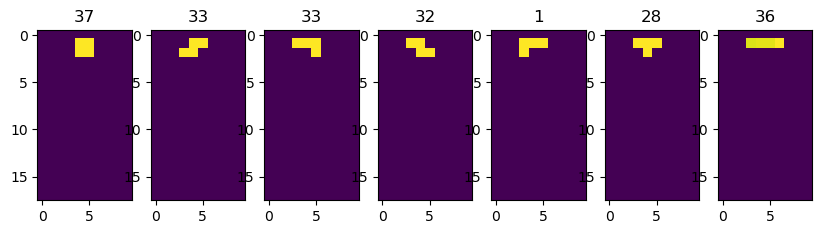

In [17]:
fig, axs = plt.subplots(1,7, figsize=(10,10))
for ax, s, c in zip(axs.flatten(), sc, co):
    ax.imshow(s)
    ax.set_title(c)

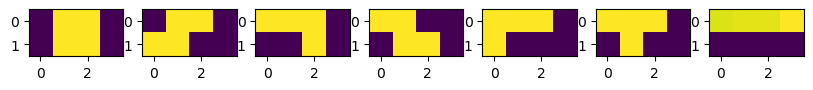

In [22]:
fig, axs = plt.subplots(1,7, figsize=(10,10))
for ax, s in zip(axs.flatten(), sc):
    ax.imshow(s[1:3,3:7])

In [70]:
shapes = np.array([
    [
        [0,1,1,0],
        [0,1,1,0]
    ],[
        [0,1,1,0],
        [1,1,0,0]
    ],[
        [1,1,1,0],
        [0,0,1,0]
    ],[
        [1,1,0,0],
        [0,1,1,0]
    ],[
        [1,1,1,0],
        [1,0,0,0]
    ],[
        [1,1,1,0],
        [0,1,0,0]
    ],[
        [1,1,1,1],
        [0,0,0,0]
    ]
], dtype="bool")
shape_names = ["O","S","J","Z","L","T","I"]
rotations = [0, 0, 1, 0, 3, 2, 1]
direction = ["left", "left", "right", "right", "left", "left", "left"]

In [119]:
roi = tetris.game_area().base[2:4,3:7] != 47
roi

array([[ True,  True,  True, False],
       [False, False,  True, False]])

In [126]:
shapes

array([[[False,  True,  True, False],
        [False,  True,  True, False]],

       [[False,  True,  True, False],
        [ True,  True, False, False]],

       [[ True,  True,  True, False],
        [False, False,  True, False]],

       [[ True,  True, False, False],
        [False,  True,  True, False]],

       [[ True,  True,  True, False],
        [ True, False, False, False]],

       [[ True,  True,  True, False],
        [False,  True, False, False]],

       [[ True,  True,  True,  True],
        [False, False, False, False]]])

In [127]:
np.all(roi == shapes, axis=(1,2))

array([False, False,  True, False, False, False, False])

In [26]:
def current_tetromino(tetris):
    roi = tetris.game_area().base[1:3,3:7] != 47
    matching = np.all(shapes == roi, axis=(1,2))
    if matching.sum() < 1:
        return None
    return shape_names[np.argmax(matching)]

Z


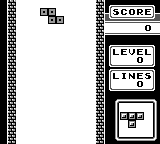

In [140]:
tetris.reset_game()
print(current_tetromino(tetris))
pyboy.screen_image()

None


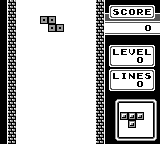

In [141]:
tetris.reset_game()
[pyboy.tick() for _ in range(60)]
print(current_tetromino(tetris))
pyboy.screen_image()

In [79]:
initial_info = pd.DataFrame({"shape": shape_names, "rot": rotations, "dir": direction}).set_index("shape")
initial_info

,rot,dir
shape,,
O,0,left
S,0,left
J,1,right
Z,0,right
L,3,left
T,2,left
I,1,left


In [165]:
pyboy.set_emulation_speed(0)

In [170]:
tetris.reset_game()
current = current_tetromino(tetris)
for r in range(initial_info.loc[current,"rot"]):
    pyboy.send_input(WindowEvent.PRESS_BUTTON_A)
    pyboy.tick()
    pyboy.send_input(WindowEvent.RELEASE_BUTTON_A)
    [pyboy.tick() for _ in range(60)]
press_arrow = WindowEvent.PRESS_ARROW_LEFT if initial_info.loc[current,"dir"] == "left" else WindowEvent.PRESS_ARROW_RIGHT
release_arrow = WindowEvent.RELEASE_ARROW_LEFT if initial_info.loc[current,"dir"] == "left" else WindowEvent.RELEASE_ARROW_RIGHT
pyboy.send_input(press_arrow)
for _ in range(800):
    pyboy.tick()
pyboy.send_input(release_arrow)

In [151]:
#pyboy.stop()